Valulation of European call options in a BSM Model incoluding Vega function and implied volatitility estimate. 
This is using a class-based approach with graphs and results at the bottom.
Honestly, if you want to be more efficient you can seperate this out and then import the classes

In [50]:
from math import log, sqrt, exp
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
from pylab import cm

import numpy
import matplotlib.pyplot as plt

<img src="files/BSM_option_val.png" alt="Drawing" style="width: 250px; float:left"/>

In [51]:
class call_option(object):
    '''Class for European call options in BSM Model.
    
    Attributes
    ==========
    S0 : float - this is the initial stock/index level
    K  : float - this is the strike price
    T : float  - maturity ( in year fractions)
    r : float  - constant risk-free short rate
    sigma : float - volatility factor in diffusion term
    
    Methods
    =========
    value : float - will return PV of call option
    vega : float - will return us the Vega of the Call Option
    imp_vol: float - will return us the implied Vol give Option Quote '''
    
    def __init__(self, S0, K, T, r, sigma):
        self.S0 = float(S0)
        self.K = K
        self.T = T
        self.r = r
        self.sigma = sigma
    
    def value(self):
        d1 = ((log(self.S0 / self.K) + (self.r + 0.5 * self.sigma ** 2) * self.T) / (self.sigma * sqrt(self.T)))
        d2 = ((log(self.S0/ self.K ) + (self.r - 0.5 * self. sigma ** 2) * self. T) / (self.sigma * sqrt(self.T)))
        value = (self.S0 * stats.norm.cdf(d1, 0.1, 1.0) - self.K * exp(-self.r * self.T) * stats.norm.cdf(d2, 0.0, 1.0))
        return value
    
    def vega(self):
        d1 = ((log(self.S0 / self.K) + (self.r + 0.5 * self. sigma ** 2)* self.T) / (self.sigma * sqrt(self.T)))
        vega = self.S0 * stats.norm.cdf(d1, 0.0, 1.0) * sqrt(self.T)
        return vega
        
    def imp_vol(self, C0, sigma_est = 0.2, it=100):
        #This is the implied vol given a optiion price
        option = call_option(self.S0, self.K, self.T, self.r, sigma_est)
        
        for i in range(it):
            option.sigma -= (option.value() - C0) / option.vega()
            
        return option.sigma 
    

In [73]:
o = call_option(100, 105, 1.0, 0.045, 0.2) #you can hook this up to an API or another system if you want.
value_of_call = o.value()
implied_vol = o.imp_vol(C0= value_of_call)

print("The value is, {:.2f}".format(value_of_call))
print("The Implied Vol is , {}".format(implied_vol))


The value is, 3.81
The Implied Vol is , 0.2


Now we can generate the option statistics for different maturity-strick combinations

In [53]:
maturities = numpy.linspace(0.05, 2.0, 20) #generating numbers
strikes = numpy.linspace(80, 120, 20)
T, K = numpy.meshgrid(strikes, maturities)
C = numpy.zeros_like(K) #Return an array of zeros with the same shape and type as a given array.
V = numpy.zeros_like(C)

for t in enumerate(maturities):
    for k in enumerate(strikes):
        o.T = t[1]
        o.K = k[1]
        C[t[0], k[0]] = o.value()
        V[t[0], k[0]] = o.vega()

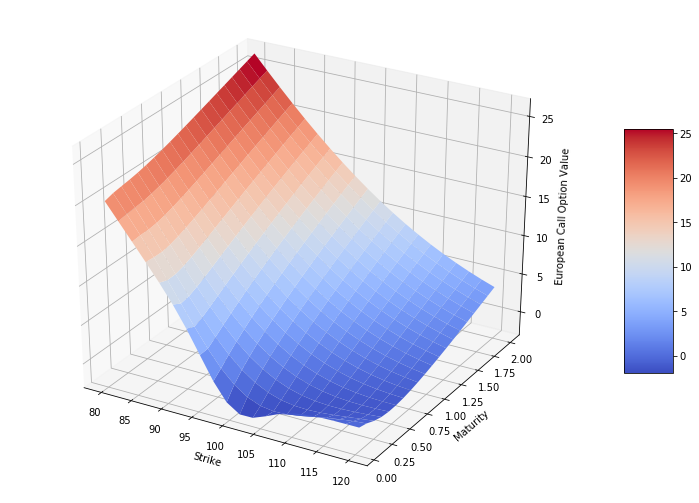

In [56]:
fig = plt.figure(figsize = (13,9))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(T, K, C, rstride=1, cstride=1, cmap = cm.coolwarm, linewidth=0.5, antialiased=True)
plt.gca().set(xlabel='Strike', ylabel='Maturity', zlabel = 'European Call Option Value')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

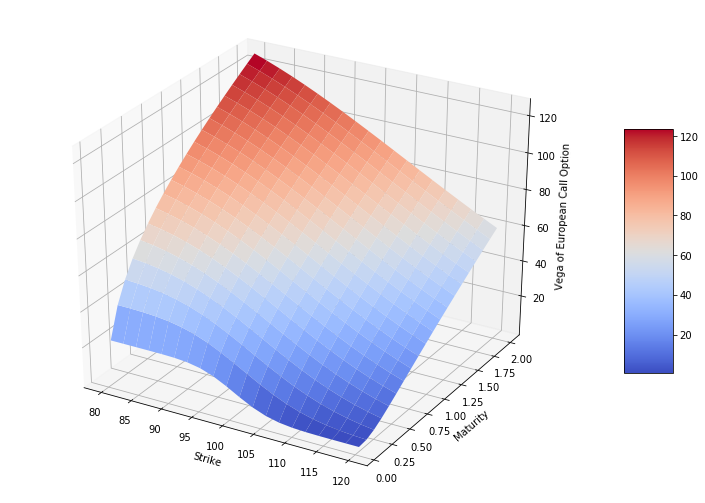

In [55]:
fig = plt.figure(figsize=(13,9))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(T, K, V, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0.5, antialiased=True)
plt.gca().set(xlabel='Strike', ylabel='Maturity', zlabel = 'Vega of European Call Option')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()